In [1]:
from ultralytics import SAM

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# Load a model
model = SAM("sam2.1_b.pt")

100%|██████████| 154M/154M [00:07<00:00, 23.0MB/s] 


In [4]:
# Run inference with bboxes prompt
results = model("./foot_size_estm/IMG_7344.jpg", bboxes=[100, 100, 200, 200])

# # Run inference with single point
# results = model(points=[900, 370], labels=[1])

# # Run inference with multiple points
# results = model(points=[[400, 370], [900, 370]], labels=[1, 1])

# # Run inference with multiple points prompt per object
# results = model(points=[[[400, 370], [900, 370]]], labels=[[1, 1]])

# # Run inference with negative points prompt
# results = model(points=[[[400, 370], [900, 370]]], labels=[[1, 0]])


image 1/1 /home/nick/Projects/foot_size_estm/foot_size_estm/IMG_7344.jpg: 1024x1024 1 0, 108.5ms
Speed: 11.6ms preprocess, 108.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


In [9]:
results[0].masks.data.shape

torch.Size([1, 4032, 3024])

In [12]:
results = model("./foot_size_estm/IMG_7344.jpg")


image 1/1 /home/nick/Projects/foot_size_estm/foot_size_estm/IMG_7344.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 4141.0ms
Speed: 11.7ms preprocess, 4141.0ms inference, 10.4ms postprocess per image at shape (1, 3, 1024, 1024)


In [15]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12', 13: '13', 14: '14', 15: '15', 16: '16', 17: '17', 18: '18', 19: '19', 20: '20', 21: '21'}
 obb: None
 orig_img: array([[[103, 122, 127],
         [107, 126, 131],
         [108, 127, 132],
         ...,
         [101, 117, 124],
         [ 98, 114, 121],
         [ 96, 112, 119]],
 
        [[105, 124, 129],
         [108, 127, 132],
         [109, 128, 133],
         ...,
         [100, 116, 123],
         [ 99, 115, 122],
         [ 98, 114, 121]],
 
        [[106, 125, 130],
         [109, 128, 133],
         [110, 129, 134],
         ...,
         [ 98, 114, 121],
         [ 99, 115, 122],
         [ 97, 113, 120]],
 
        ...,
 
        [[136, 155, 162],
         [136, 155, 162],
         

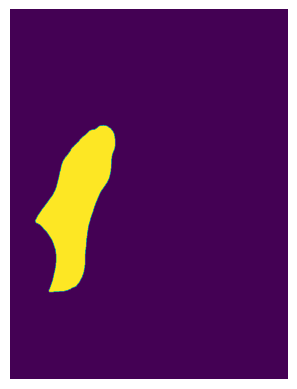

In [51]:
# Get the original image as a numpy array
img = np.array(results[0].orig_img)

# Get the segmentation masks
masks = results[0].masks.data

masks = masks.cpu().numpy() 

# masks= masks[0]

# plt.imshow(masks)

# Plot the image and overlay the masks
# plt.imshow(img)

# num_masks = masks.shape[0]
# colors = np.random.rand(num_masks, 3)  # RGB values between 0-1

# for i, mask in enumerate(masks):
#     colored_mask = np.zeros_like(img, dtype=np.float32)
#     for c in range(3):  # Apply same mask to R,G,B with chosen color
#         colored_mask[:, :, c] = mask * colors[i, c]

#     plt.imshow(colored_mask)  # Adjust alpha for transparency

idx = 8
for mask in masks[idx : idx + 1]:
    # plt.imshow(mask, alpha=0.5)  # Adjust alpha for mask transparency
    plt.imshow(mask) 
plt.axis('off')  # Hide the axes
plt.show()
# plt.imsave("seg.png")

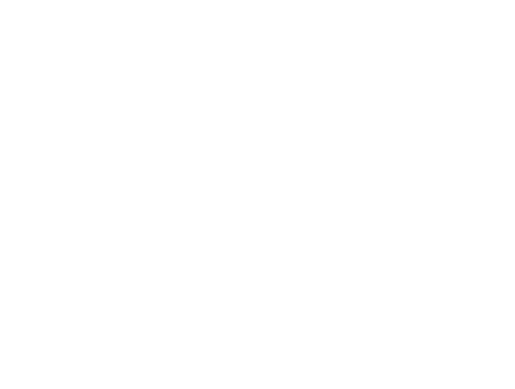

In [65]:
idx = 22
for mask in masks[idx : idx + 1]:
    # plt.imshow(mask, alpha=0.5)  # Adjust alpha for mask transparency
    plt.imshow(mask) 
plt.axis('off')  # Hide the axes
plt.show()

In [29]:
masks = results[0].masks.data

In [32]:
masks= np.array(masks[0])

TypeError: 'builtin_function_or_method' object is not subscriptable

In [33]:
masks.shape

AttributeError: 'builtin_function_or_method' object has no attribute 'shape'

In [37]:
results[0].show()

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


In [66]:
results_2 = model("./foot_size_estm/IMG_7343.jpg")


image 1/1 /home/nick/Projects/foot_size_estm/foot_size_estm/IMG_7343.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 4165.9ms
Speed: 15.5ms preprocess, 4165.9ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


(5, 4032, 3024)


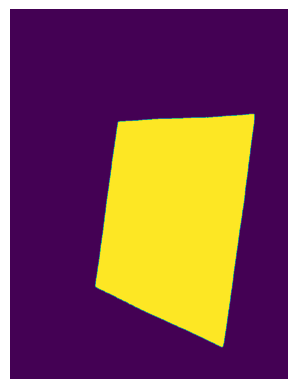

In [69]:
# Get the original image as a numpy array
img_2 = np.array(results_2[0].orig_img)

# Get the segmentation masks
masks_2 = results_2[0].masks.data

masks_2 = masks_2.cpu().numpy() 

print(masks_2.shape)

# masks= masks[0]

# plt.imshow(masks)

# Plot the image and overlay the masks
# plt.imshow(img)

# num_masks = masks.shape[0]
# colors = np.random.rand(num_masks, 3)  # RGB values between 0-1

# for i, mask in enumerate(masks):
#     colored_mask = np.zeros_like(img, dtype=np.float32)
#     for c in range(3):  # Apply same mask to R,G,B with chosen color
#         colored_mask[:, :, c] = mask * colors[i, c]

#     plt.imshow(colored_mask)  # Adjust alpha for transparency

idx = 0
for mask in masks_2[idx : idx + 1]:
    # plt.imshow(mask, alpha=0.5)  # Adjust alpha for mask transparency
    plt.imshow(mask) 
plt.axis('off')  # Hide the axes
plt.show()
# plt.imsave("seg.png")

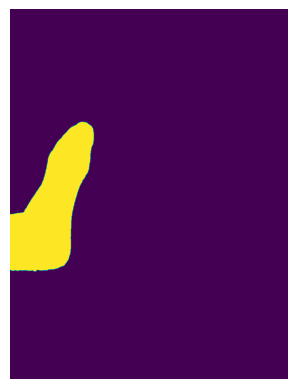

In [72]:
idx = 3
for mask in masks_2[idx : idx + 1]:
    # plt.imshow(mask, alpha=0.5)  # Adjust alpha for mask transparency
    plt.imshow(mask) 
plt.axis('off')  # Hide the axes
plt.show()

In [73]:
paper_mask = masks_2[0]
foot_mask = masks_2[3]

In [74]:
np.unique(paper_mask)

array([False,  True])

In [75]:
paper_mask.shape

(4032, 3024)

In [94]:
top_left_p = [-1, -1]
top_right_p = [-1, -1]
bottom_left_p = [-1, -1]
bottom_right_p = [-1, -1]

heigh, width = paper_mask.shape

for yy in range(heigh):
    for xx in range(width):
        if not paper_mask[yy, xx]:
            continue

        if top_left_p[0] == -1:
            top_left_p[0] = xx
            top_left_p[1] = yy

            top_right_p[0] = xx
            top_right_p[1] = yy

            bottom_left_p[0] = xx
            bottom_left_p[1] = yy

            bottom_right_p[0] = xx
            bottom_right_p[1] = yy

        if xx + yy < top_left_p[0] + top_left_p[1]:
            top_left_p[0] = xx
            top_left_p[1] = yy

        if xx + (heigh - yy) > top_right_p[0] + (heigh - top_right_p[1]):
            top_right_p[0] = xx
            top_right_p[1] = yy

        if width - xx + yy > (width - bottom_left_p[0]) + bottom_left_p[1]:
            bottom_left_p[0] = xx
            bottom_left_p[1] = yy

        if xx + yy > bottom_right_p[0] + bottom_right_p[1]:
            bottom_right_p[0] = xx
            bottom_right_p[1] = yy

In [89]:
# top_left_p = [top_left_p[1], top_left_p[0]]
# top_right_p = [top_right_p[1], top_right_p[0]]
# bottom_left_p = [bottom_left_p[1], bottom_left_p[0]]
# bottom_right_p = [bottom_right_p[1], bottom_right_p[0]]

In [109]:
points = np.array([top_left_p, top_right_p, bottom_right_p, bottom_left_p])
# points = np.array([top_left_p, top_right_p])

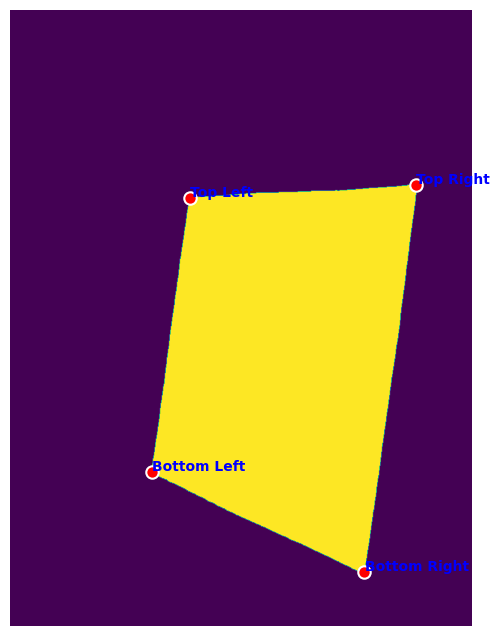

In [110]:
# Show image
plt.figure(figsize=(8, 8))
plt.imshow(paper_mask)

# Plot circular markers
plt.scatter(points[:, 0], points[:, 1], 
            c="red", s=80, marker="o", edgecolors="white", linewidths=1.5)

# (Optional) Label each point
labels = ["Top Left", "Top Right", "Bottom Right", "Bottom Left"]
for (x, y), label in zip(points, labels):
    plt.text(x+5, y-5, label, color="blue", fontsize=10, weight="bold")

plt.axis("off")
plt.show()

In [104]:
toe_p = [-1, -1]
ankle_p = [-1, -1]

heigh, width = foot_mask.shape

for yy in range(heigh):
    for xx in range(width):
        if not foot_mask[yy, xx]:
            continue

        if toe_p[0] == -1:
            toe_p[0] = xx
            toe_p[1] = yy

            ankle_p[0] = xx
            ankle_p[1] = yy

        if yy < toe_p[1]:
            toe_p[0] = xx
            toe_p[1] = yy

        if xx + yy > ankle_p[0] + ankle_p[1]:
            ankle_p[0] = xx
            ankle_p[1] = yy

In [105]:
points_f = np.array([toe_p, ankle_p])

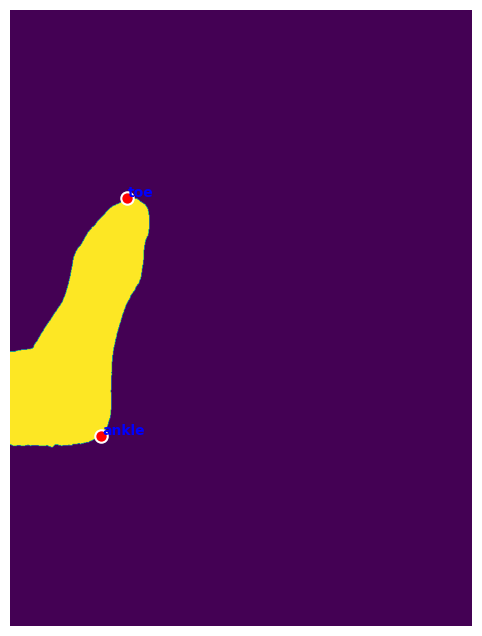

In [106]:
# Show image
plt.figure(figsize=(8, 8))
plt.imshow(foot_mask)

# Plot circular markers
plt.scatter(points_f[:, 0], points_f[:, 1], 
            c="red", s=80, marker="o", edgecolors="white", linewidths=1.5)

# (Optional) Label each point
labels = ["toe", "ankle"]
for (x, y), label in zip(points_f, labels):
    plt.text(x+5, y-5, label, color="blue", fontsize=10, weight="bold")

plt.axis("off")
plt.show()

In [107]:
import cv2

In [108]:
def order_corners(pts):
    """Return corners as (top-left, top-right, bottom-right, bottom-left)."""
    pts = np.asarray(pts, dtype=np.float32)
    s = pts.sum(axis=1)
    d = np.diff(pts, axis=1).ravel()
    tl = pts[np.argmin(s)]
    br = pts[np.argmax(s)]
    tr = pts[np.argmin(d)]
    bl = pts[np.argmax(d)]
    return np.array([tl, tr, br, bl], dtype=np.float32)


def foot_distance_mm(paper_corners, toe_pt, ankle_pt, paper_size_mm):
    """
    paper_corners: list/array of 4 (x,y) image points (any order) on the paper corners
    toe_pt, ankle_pt: (x,y) image points
    paper_size_mm: (width_mm, height_mm), e.g. A4=(210, 297), Letter=(215.9, 279.4)
    """
    W_mm, H_mm = paper_size_mm

    # 1) Order paper corners consistently
    src = order_corners(paper_corners)  # tl, tr, br, bl

    # 2) Target plane is a rectangle in MILLIMETERS
    dst = np.array([[0, 0],
                    [W_mm, 0],
                    [W_mm, H_mm],
                    [0, H_mm]], dtype=np.float32)

    # 3) Homography from image -> metric (mm) plane
    H, _ = cv2.findHomography(src, dst, method=0)

    # 4) Transform toe/ankle into metric plane (units: mm)
    pts = np.array([[toe_pt, ankle_pt]], dtype=np.float32)  # shape (1,2,2)
    pts_mm = cv2.perspectiveTransform(pts, H)[0]            # shape (2,2)

    toe_mm, ankle_mm = pts_mm[0], pts_mm[1]
    dist_mm = float(np.linalg.norm(toe_mm - ankle_mm))
    return dist_mm, toe_mm, ankle_mm


In [111]:
# ----------------- EXAMPLE USAGE -----------------

# Replace these with your actual detections (image pixel coordinates)
paper_corners = points

toe_pt   = toe_p
ankle_pt = ankle_p

# Choose paper size:
A4_MM      = (210.0, 297.0)
LETTER_MM  = (215.9, 279.4)  # 8.5 x 11 inches

dist_mm, toe_mm, ankle_mm = foot_distance_mm(
    paper_corners, toe_pt, ankle_pt, paper_size_mm=LETTER_MM  # or A4_MM
)

print(f"Toe–ankle distance: {dist_mm:.1f} mm ({dist_mm/10:.2f} cm)")

Toe–ankle distance: 270.9 mm (27.09 cm)


In [112]:
# Mondopoint (cm) reference to EU/US/UK - adults (approx.)
# MEN
MEN_TABLE = {
    24.5: {"EU": 39,   "US": 6.5, "UK": 6},
    25.0: {"EU": 40,   "US": 7.0, "UK": 6.5},
    25.5: {"EU": 40.5, "US": 7.5, "UK": 7},
    26.0: {"EU": 41,   "US": 8.0, "UK": 7.5},
    26.5: {"EU": 42,   "US": 8.5, "UK": 8},
    27.0: {"EU": 42.5, "US": 9.0, "UK": 8.5},
    27.5: {"EU": 43,   "US": 9.5, "UK": 9},
    28.0: {"EU": 44,   "US":10.0, "UK": 9.5},
    28.5: {"EU": 44.5, "US":10.5, "UK":10},
    29.0: {"EU": 45,   "US":11.0, "UK":10.5},
    29.5: {"EU": 46,   "US":11.5, "UK":11},
    30.0: {"EU": 46.5, "US":12.0, "UK":11.5},
}

# WOMEN
WOMEN_TABLE = {
    22.0: {"EU": 35,   "US": 5.0, "UK": 2.5},
    22.5: {"EU": 35.5, "US": 5.5, "UK": 3.0},
    23.0: {"EU": 36,   "US": 6.0, "UK": 3.5},
    23.5: {"EU": 37,   "US": 6.5, "UK": 4.0},
    24.0: {"EU": 37.5, "US": 7.0, "UK": 4.5},
    24.5: {"EU": 38,   "US": 7.5, "UK": 5.0},
    25.0: {"EU": 39,   "US": 8.0, "UK": 5.5},
    25.5: {"EU": 39.5, "US": 8.5, "UK": 6.0},
    26.0: {"EU": 40,   "US": 9.0, "UK": 6.5},
    26.5: {"EU": 41,   "US": 9.5, "UK": 7.0},
    27.0: {"EU": 42,   "US":10.0, "UK": 7.5},
}